## Comparing the performance of FCNN and CNN on the CIFAR-10 Dataset

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

2024-08-18 16:59:24.718651: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-18 16:59:24.722999: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-18 16:59:24.770807: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-18 16:59:24.857118: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-18 16:59:24.908655: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

In [2]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 106s 1us/step


In [3]:
print(f"Training set shape: {X_train.shape}")
print(f"Training set shape: {X_test.shape}\n")

Training set shape: (50000, 32, 32, 3)
Training set shape: (10000, 32, 32, 3)



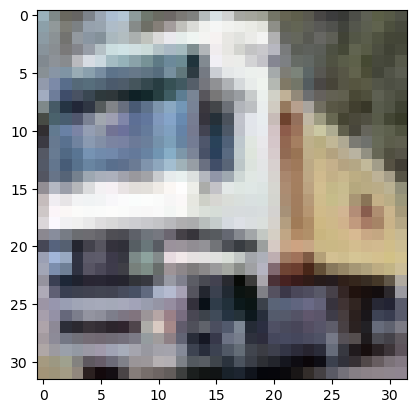

In [4]:
import cv2
plt.imshow(X_train[1])

In [5]:
#finding the number of classes
print('The Total number of Classes are: ',len(np.unique(y_train)))
print('The Dimension of each image is: ',X_train[0].shape)

The Total number of Classes are:  10
The Dimension of each image is:  (32, 32, 3)


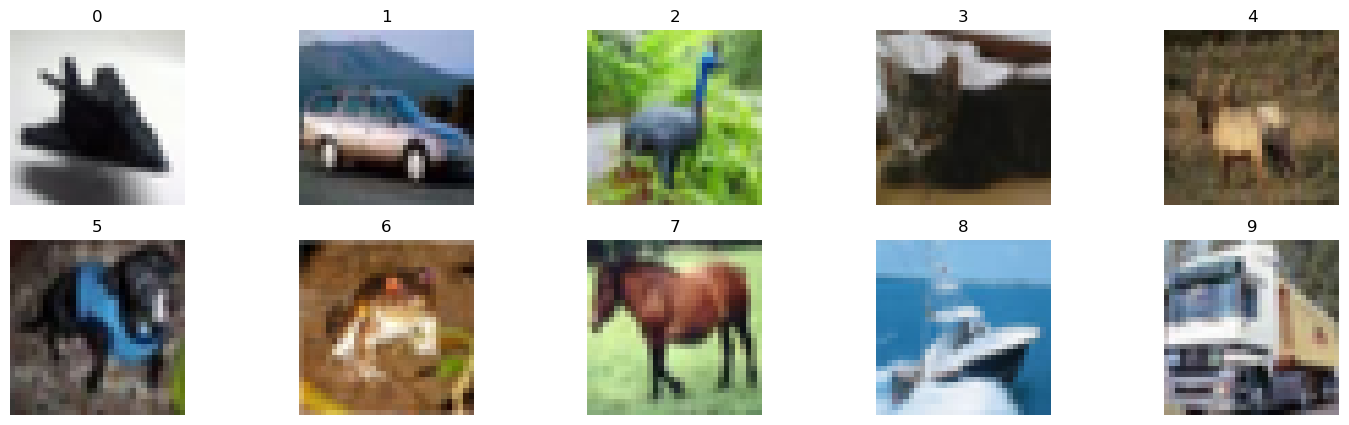

In [7]:
#displaying the first image from each class
fig, ax= plt.subplots(nrows= 2, ncols= 5, figsize= (18,5))

i= 0
for j in range(2):
  for k in range(5):
    ax[j,k].imshow(X_train[list(y_train).index(i)])
    ax[j,k].axis('off')
    ax[j,k].set_title(i)
    i+=1
plt.show()

In [8]:
import cv2
x_train_gray = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in X_train])
x_test_gray = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in X_test])

In [9]:
print(f"Training set shape: {x_train_gray.shape}")
print(f"Training set shape: {x_test_gray.shape}\n")
print('The Dimension of each image is: ',x_train_gray[0].shape)

Training set shape: (50000, 32, 32)
Training set shape: (10000, 32, 32)

The Dimension of each image is:  (32, 32)


## 1) Training the FCNN

In [14]:
from tensorflow.keras.layers import Dropout,BatchNormalization,Dense,Flatten,ReLU
from tensorflow.keras.models import Sequential
model = Sequential([
    Flatten(input_shape=(32,32),name="flatten_layer"),
    Dense(512, name="HiddenLayer1"),
    BatchNormalization(),
    ReLU(),
    Dropout(0.3),
    Dense(256, name="HiddenLayer2"),
    BatchNormalization(),
    ReLU(),
    Dropout(0.3),
    Dense(128, name="HiddenLayer3"),
    BatchNormalization(),
    ReLU(),
    Dropout(0.3),
    Dense(10, activation="softmax", name="OutputLayer")
])

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_layer (Flatten)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer1 (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer2 (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer3 (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,898 (2.65 MB)

 Trainable params: 692,106 (2.64 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [11]:
#compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=1e-4) 

model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [17]:
#compiling the model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
import datetime
# Early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Set batch size and epochs
batch_size = 32
epochs = 10

# Record start time
start = datetime.datetime.now()

# Train the model
history = model.fit(x_train_gray, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Record end time
end = datetime.datetime.now()
print("\nTime taken to run:", end-start)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3239 - loss: 1.8779 - val_accuracy: 0.3032 - val_loss: 1.9375
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.3623 - loss: 1.7938 - val_accuracy: 0.3420 - val_loss: 1.8236
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3791 - loss: 1.7384 - val_accuracy: 0.3596 - val_loss: 1.7580
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.3948 - loss: 1.6941 - val_accuracy: 0.3988 - val_loss: 1.6862
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.4156 - loss: 1.6607 - val_accuracy: 0.4150 - val_loss: 1.6560
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.4231 - loss: 1.6259 - val_accuracy: 0.4218 - val_loss: 1.6410
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4309 - loss: 1.6076 - val_accuracy: 0.4052 - val_loss: 1.6402
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.4431 - loss

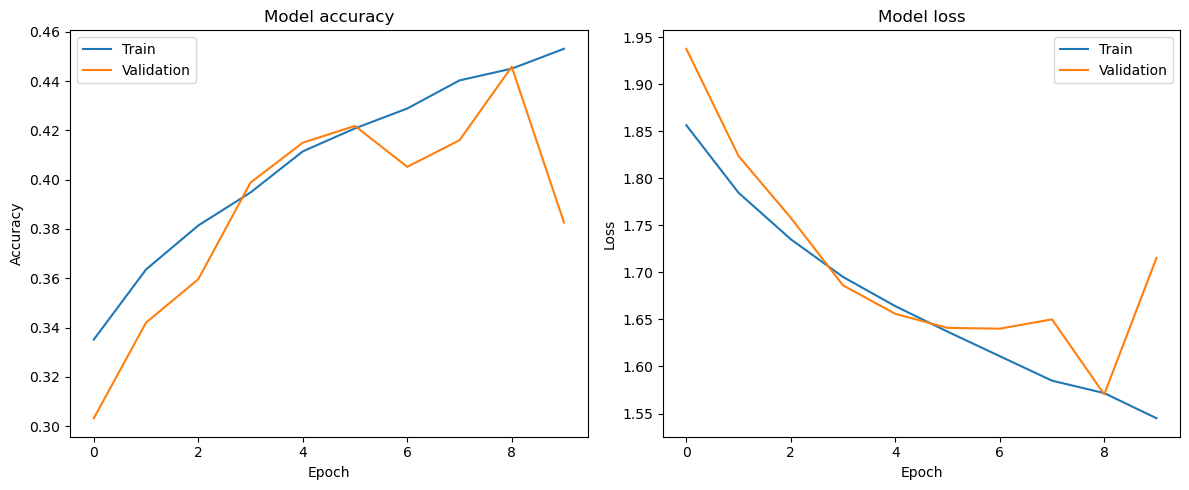

In [20]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

## 2) Training CNNs

In [21]:
#Defining the CNN1 Architecture
cnn1 = Sequential([
    Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1), strides=(1, 1), padding='valid'),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(100,activation='relu', name="HiddenLayer1"),
    Dense(10, activation='softmax', name="OutputLayer")
])
cnn1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer1 (Dense)            │ (None, 100)            │       627,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 629,142 (2.40 MB)

 Trainable params: 629,142 (2.40 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
cnn1.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [23]:
cnn2 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1), strides=(1, 1), padding='valid'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=(1, 1), padding='valid'),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(100,activation='relu', name="HiddenLayer1"),
    Dense(10, activation='softmax', name="OutputLayer")
])
cnn2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer1 (Dense)            │ (None, 100)            │     1,254,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OutputLayer (Dense)             │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,274,326 (4.86 MB)

 Trainable params: 1,274,326 (4.86 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
cnn2.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [25]:
# Early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Set batch size and epochs
batch_size = 32
epochs = 15

# Record start time for CNN-1
start_cnn1 = datetime.datetime.now()

# Train CNN-1
history_cnn1 = cnn1.fit(x_train_gray, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[early_stopping])

# Record end time for CNN-1
end_cnn1 = datetime.datetime.now()
print("\nTime taken to run CNN-1:", end_cnn1-start_cnn1)

# Record start time for CNN-2
start_cnn2 = datetime.datetime.now()

# Train CNN-2
history_cnn2 = cnn2.fit(x_train_gray, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[early_stopping])

# Record end time for CNN-2
end_cnn2 = datetime.datetime.now()
print("\nTime taken to run CNN-2:", end_cnn2-start_cnn2)

Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.2511 - loss: 4.6956 - val_accuracy: 0.4120 - val_loss: 1.6805
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.4627 - loss: 1.5299 - val_accuracy: 0.4364 - val_loss: 1.6882
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5366 - loss: 1.3342 - val_accuracy: 0.5114 - val_loss: 1.4409
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6007 - loss: 1.1561 - val_accuracy: 0.5040 - val_loss: 1.5118
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.6455 - loss: 1.0145 - val_accuracy: 0.5088 - val_loss: 1.6225
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.6916 - loss: 0.8891 - val_accuracy: 0.5284 - val_loss: 1.5397

Time taken to run CNN-1: 0:01:29.294634
Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 40ms/step - accuracy: 0.2840 - loss: 4.7955 - val_accuracy: 0.4592 - val_loss: 1.5160
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━

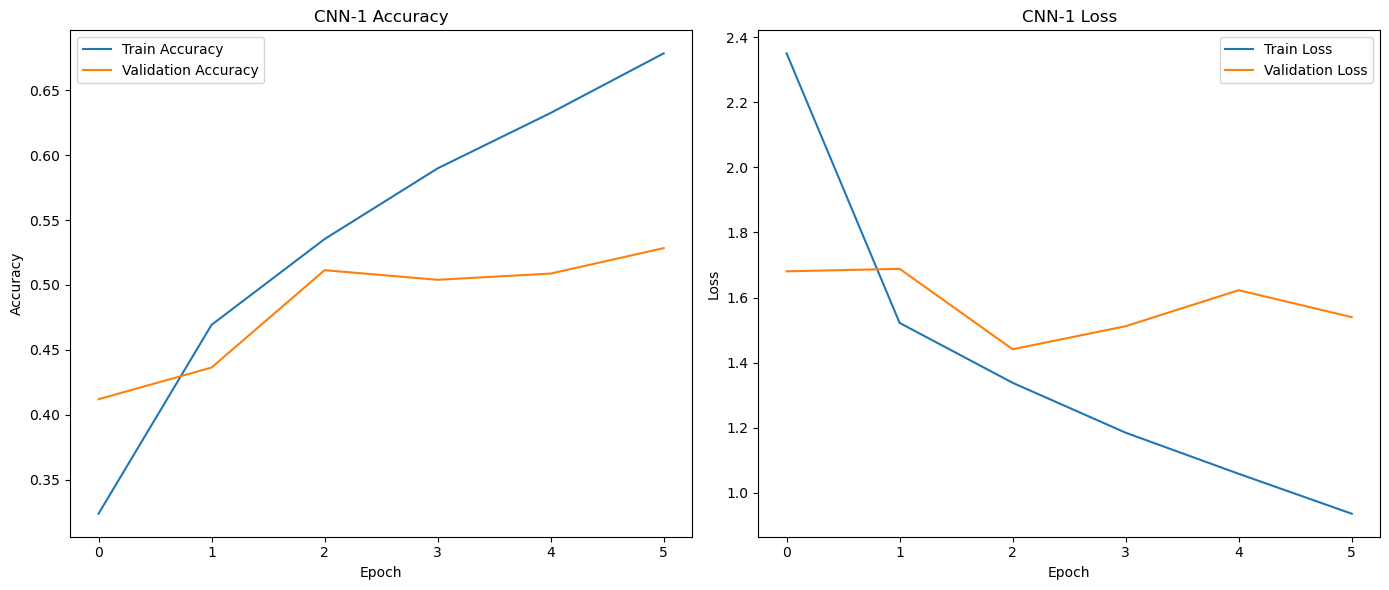

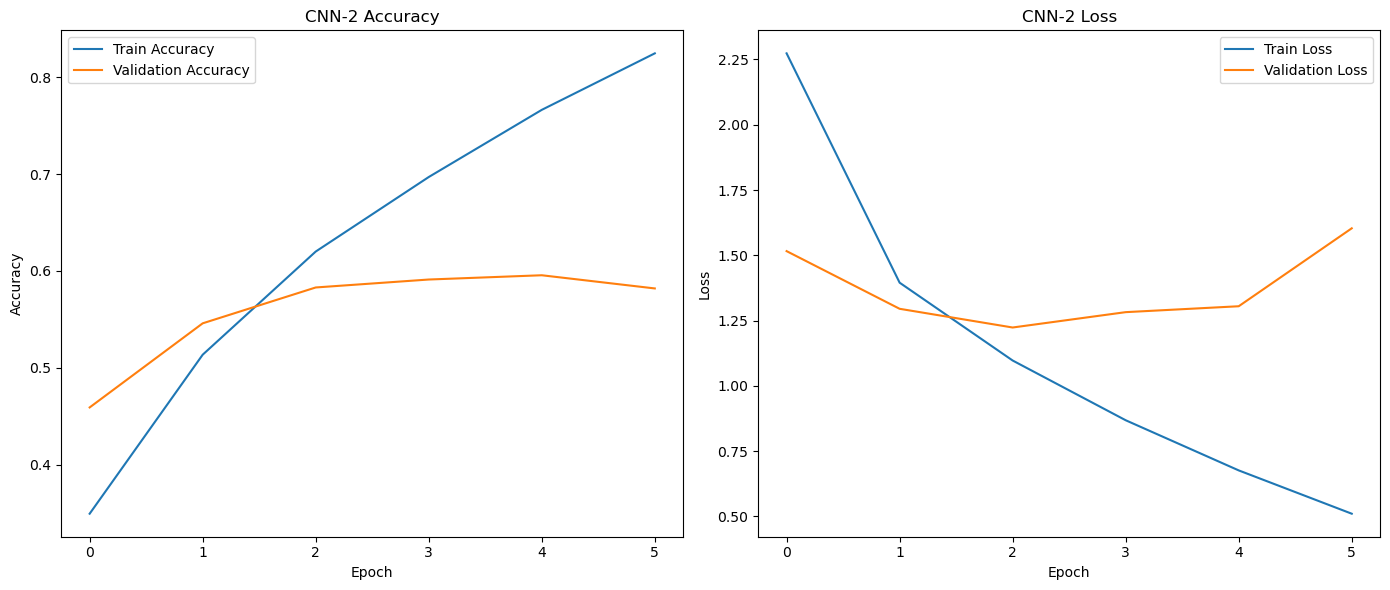

In [26]:
# Plot performance curves for CNN-1
plt.figure(figsize=(14, 6))

# Plot for CNN-1
plt.subplot(1, 2, 1)
plt.plot(history_cnn1.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn1.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN-1 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn1.history['loss'], label='Train Loss')
plt.plot(history_cnn1.history['val_loss'], label='Validation Loss')
plt.title('CNN-1 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plot performance curves for CNN-2
plt.figure(figsize=(14, 6))

# Plot for CNN-2
plt.subplot(1, 2, 1)
plt.plot(history_cnn2.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn2.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN-2 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn2.history['loss'], label='Train Loss')
plt.plot(history_cnn2.history['val_loss'], label='Validation Loss')
plt.title('CNN-2 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [27]:
# Evaluate CNN-1 on the test set
test_loss_cnn1, test_accuracy_cnn1 = cnn1.evaluate(x_test_gray, y_test)
print(f"CNN-1 Test Accuracy: {test_accuracy_cnn1}, Test Loss: {test_loss_cnn1}")

# Evaluate CNN-2 on the test set
test_loss_cnn2, test_accuracy_cnn2 = cnn2.evaluate(x_test_gray, y_test)
print(f"CNN-2 Test Accuracy: {test_accuracy_cnn2}, Test Loss: {test_loss_cnn2}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5094 - loss: 1.4716
CNN-1 Test Accuracy: 0.5023000240325928, Test Loss: 1.483017921447754
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5678 - loss: 1.2829
CNN-2 Test Accuracy: 0.5666000247001648, Test Loss: 1.2841651439666748


In [28]:
#Implementing a CNN Model with a more complex fcnn
cnn3_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=3, strides=1, padding='valid', activation='relu', input_shape=(32,32,1), name="conv1"),
    tf.keras.layers.Conv2D(32, kernel_size=3, strides=1, padding='valid', activation='relu', name="conv2"),
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, name="maxpool1"),
    tf.keras.layers.Flatten(name="flatten"),
    tf.keras.layers.Dense(512, activation="relu", name="HiddenLayer1"),
    tf.keras.layers.Dropout(0.3),  # Dropout to reduce overfitting
    tf.keras.layers.Dense(256, activation="relu", name="HiddenLayer2"),
    tf.keras.layers.Dropout(0.3),  # Dropout to reduce overfitting
    tf.keras.layers.Dense(128, activation="relu", name="HiddenLayer3"),
])
cnn3_model.add(tf.keras.layers.Dense(10, activation='softmax', name="outputLayer"))

cnn3_model.summary()

# Compile the model
cnn3_model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool1 (MaxPooling2D)         │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer1 (Dense)            │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer2 (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ HiddenLayer3 (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputLayer (Dense)             │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,386,858 (12.92 MB)

 Trainable params: 3,386,858 (12.92 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Set batch size and epochs
batch_size = 32
epochs = 15

# Record start time for CNN-1
start_cnn3 = datetime.datetime.now()

# Train CNN-1
history_cnn3 = cnn3_model.fit(x_train_gray, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[early_stopping])

# Record end time for CNN-1
end_cnn3 = datetime.datetime.now()
print("\nTime taken to run CNN-1:", end_cnn3-start_cnn3)

Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 93s 66ms/step - accuracy: 0.2730 - loss: 3.2234 - val_accuracy: 0.5046 - val_loss: 1.4322
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 92s 65ms/step - accuracy: 0.5156 - loss: 1.3953 - val_accuracy: 0.5932 - val_loss: 1.2036
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 91s 65ms/step - accuracy: 0.6112 - loss: 1.1219 - val_accuracy: 0.6104 - val_loss: 1.1344
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 95s 68ms/step - accuracy: 0.6831 - loss: 0.9166 - val_accuracy: 0.6352 - val_loss: 1.0767
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 103s 73ms/step - accuracy: 0.7495 - loss: 0.7318 - val_accuracy: 0.6354 - val_loss: 1.1477
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 96s 68ms/step - accuracy: 0.7983 - loss: 0.5928 - val_accuracy: 0.6332 - val_loss: 1.1573
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 89s 63ms/step - accuracy: 0.8425 - loss: 0.4701 - val_accuracy: 0.6256 - val_loss: 1.2215

Time taken to run CNN-1: 0:10:58.968819


### As we can observe, the Convolutional Neural Networks clearly outperform the Fully Connected Neural Network, despite having fewer parameters!